A case study using iris dataset for KNN algorithm

In [ ]:
# import modules for this project
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# load iris dataset
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# training testing split
res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

# print some interested metrics
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

# re-do KNN using some specific parameters.
knn2 = KNeighborsClassifier(algorithm='auto',
                            leaf_size=30,
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None,
                            n_jobs=1,
                            n_neighbors=5,
                            weights='uniform')

knn.fit(train_data, train_labels)
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)

Predictions from the classifier:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
0.975


0.9666666666666667

Use this command to help with choice of paramters in the `KNeighborsClassifier` function.

In [ ]:
help(KNeighborsClassifier)

Use the following code to generate an artificial dataset which contain three classes. Conduct a similar KNN analysis to the dataset and report your accuracy.

Training Accuracy: 1.0
Testing Accuracy: 1.0

First 15 test predictions: [2 0 0 1 2 1 1 2 1 2 1 0 0 0 2 1 1 2 2 1]
First 15 true labels:      [2 0 0 1 2 1 1 2 1 2 1 0 0 0 2 1 1 2 2 1]

New points: [[3 5]
 [5 7]
 [1 8]]
Predicted classes: [0 1 2]


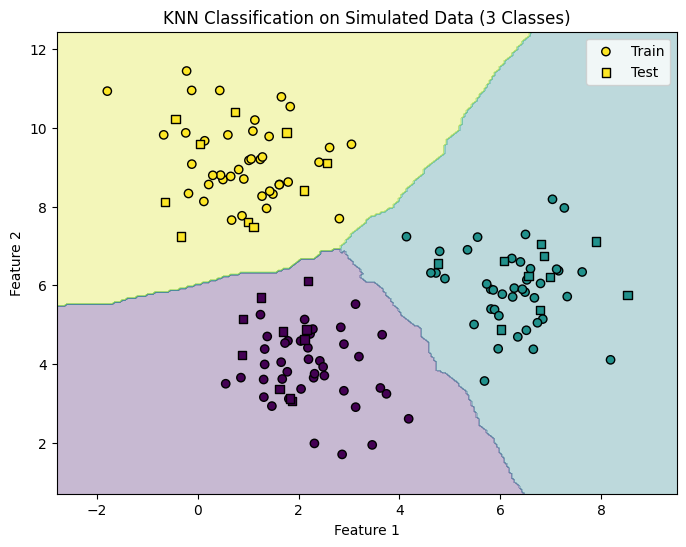

(1.0, 1.0)

In [ ]:
# Perform KNN analysis using make_blobs generated dataset with 3 classes
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Generate artificial dataset with 3 clusters/classes

# Define cluster centers for 3 classes
centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)

# Create dataset with 150 samples distributed around given centers
data, labels = make_blobs(n_samples=150, centers=np.array(centers),
                          random_state=1)

# Split into train and test (80-20)
# Stratify ensures equal class proportion in train/test

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, stratify=labels, random_state=12
)

# Train KNN

# Default parameters: n_neighbors=5, metric='minkowski' (Euclidean distance)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions and accuracy
train_acc = accuracy_score(y_train, knn.predict(X_train))
test_acc = accuracy_score(y_test, knn.predict(X_test))

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

# Predictions on test set
test_predictions = knn.predict(X_test)
print("\nFirst 15 test predictions:", test_predictions[:15])
print("First 15 true labels:     ", y_test[:15])

# Example new unseen points
new_points = np.array([[3, 5], [5, 7], [1, 8]])
new_predictions = knn.predict(new_points)

print("\nNew points:", new_points)
print("Predicted classes:", new_predictions)


# Plot results (decision boundaries)

# Define mesh grid for plotting decision regions
h = 0.05  # step size for mesh
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary as contour + training/test points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolor='k', label="Test")
plt.title("KNN Classification on Simulated Data (3 Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

train_acc, test_acc


The KNN classifier reached ideal scores since testing and training accuracy equaled 1.0. Therefore, the model could generalize from the training set to new data well. Since the dataset was generated with three well-separated clusters, such flawless accuracy is possible. Because of this generation, KNN can easily assign each point to the correct class.

In further confirming of the model's reliability, the predictions did exactly match up with the true labels for the test set. Three of the unseen data points , (3, 5), (5, 7), and (1, 8) , were classified correctly. They were classified into Class 0 as well as Class 1, and Class 2, respectively. These results align with expectations because each point lies nearest a predefined cluster center.

Decision boundary plot visualizes classifier behavior with clarity. Each class corresponds to each region so the feature space is divided into distinct regions, and all testing and training points fall within their appropriate regions. This experiment shows that in cases where clusters have good structure and also are separable, KNN perfectly predicts and then makes quite reliable predictions.